(8,)
tx bits:  [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0]
FEC Encoded binary data: 000010100101010001101000011001010010000001110011011101010110111010000101110010111001111011001011
[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1]
QAM Symbols (one row per subcarrier):[ 1.+1.j  1.+1.j -1.+1.j -1.+1.j  1.-1.j  1.-1.j  1.-1.j  1.+1.j  1.-1.j
 -1.+1.j -1.+1.j  1.+1.j  1.-1.j -1.+1.j  1.-1.j  1.-1.j  1.+1.j -1.+1.j
  1.+1.j  1.+1.j  1.-1.j -1.-1.j  1.+1.j -1.-1.j  1.-1.j -1.-1.j  1.-1.j
  1.-1.j  1.-1.j -1.+1.j -1.-1.j -1.+1.j -1.+1.j  1.+1.j  1.-1.j  1.-1.j
 -1.-1.j  1.+1.j -1.+1.j -1.-1.j -1.+1.j  1.-1.j -1.

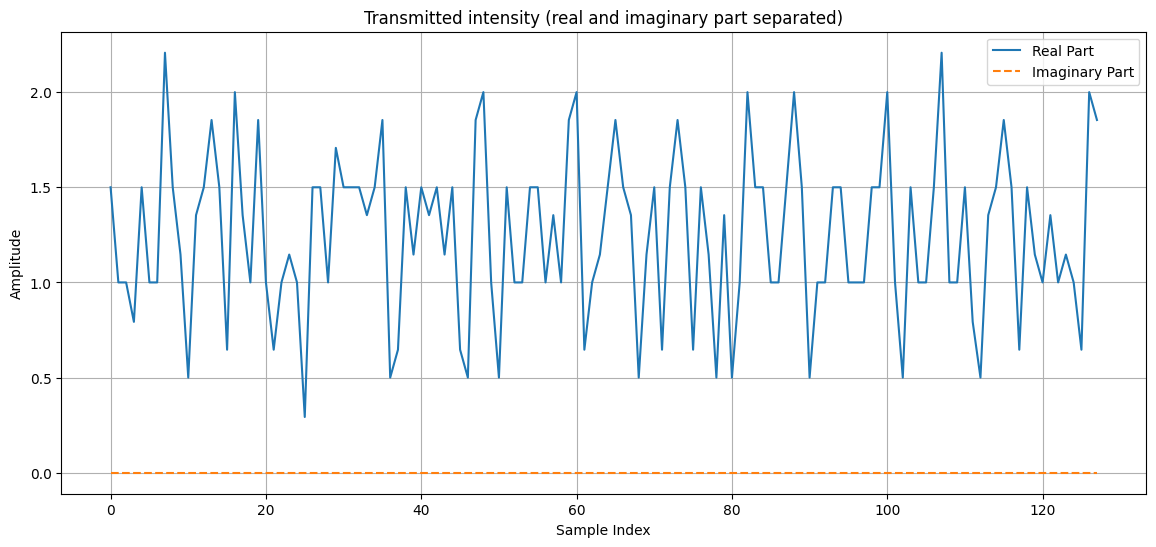

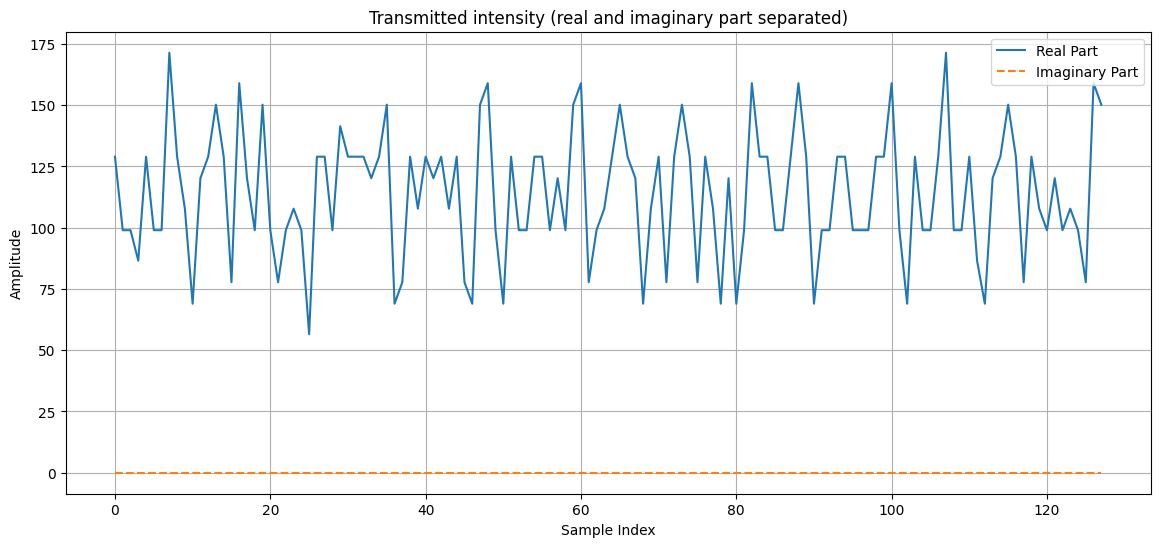

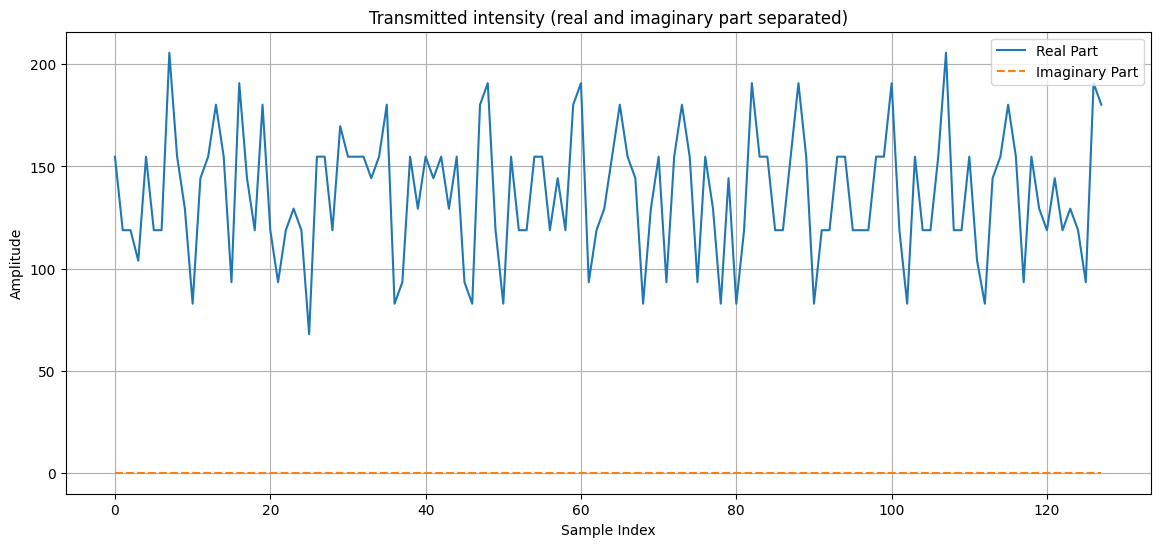

Transmitted intensity : [155 119 119 104 155 119 119 206 155 129  83 144 155 180 155  93 191 144
 119 180 119  93 119 129 119  68 155 155 119 170 155 155 155 144 155 180
  83  93 155 129 155 144 155 129 155  93  83 180 191 119  83 155 119 119
 155 155 119 144 119 180 191  93 119 129 155 180 155 144  83 129 155  93
 155 180 155  93 155 129  83 144  83 119 191 155 155 119 119 155 191 155
  83 119 119 155 155 119 119 119 155 155 191 119  83 155 119 119 155 206
 119 119 155 104  83 144 155 180 155  93 155 129 119 144 119 129 119  93
 191 180]
Normalized Signal Length: 128
155, 119, 119, 104, 155, 119, 119, 206, 155, 129, 83, 144, 155, 180, 155, 93, 191, 144, 119, 180, 119, 93, 119, 129, 119, 68, 155, 155, 119, 170, 155, 155, 155, 144, 155, 180, 83, 93, 155, 129, 155, 144, 155, 129, 155, 93, 83, 180, 191, 119, 83, 155, 119, 119, 155, 155, 119, 144, 119, 180, 191, 93, 119, 129, 155, 180, 155, 144, 83, 129, 155, 93, 155, 180, 155, 93, 155, 129, 83, 144, 83, 119, 191, 155, 155, 119, 119, 155, 

In [5]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import reedsolo

def string_to_bits(s):
    """Convert a string to a list of bits."""
    return list(itertools.chain.from_iterable([list(map(int, f"{ord(c):08b}")) for c in s]))

# def bits_to_string(bits):
#     """Convert a list of bits back to a string."""
#     chars = [chr(int(''.join(map(str, bits[i:i + 8])), 2)) for i in range(0, len(bits), 8)]
#     return ''.join(chars)

def binary_to_bytes(binary_str):
    """Convert a binary string to bytes."""
    byte_array = bytearray()
    for i in range(0, len(binary_str), 8):
        byte_array.append(int(binary_str[i:i+8], 2))
    return bytes(byte_array)

def bytes_to_binary(byte_array):
    """Convert bytes to a binary string."""
    return ''.join(f'{byte:08b}' for byte in byte_array)

def binary_to_qam16(bits):
    """Convert a binary list to QAM-16 symbols."""
    M = 4  # QAM-4
    bits_per_symbol = int(np.log2(M))  # 4 bits per QAM-16 symbol
    
    # Ensure the stream length is a multiple of bits_per_symbol (4 for QAM-4)
    pad_length = (bits_per_symbol - len(bits) % bits_per_symbol) % bits_per_symbol
    padded_bits = np.append(bits, [0] * pad_length)

    # # QAM-16 mapping
    # mapping = {
    #     '0000': -3-3j, '0001': -3-1j, '0010': -3+3j, '0011': -3+1j,
    #     '0100': -1-3j, '0101': -1-1j, '0110': -1+3j, '0111': -1+1j,
    #     '1000':  3-3j, '1001':  3-1j, '1010':  3+3j, '1011':  3+1j,
    #     '1100':  1-3j, '1101':  1-1j, '1110':  1+3j, '1111':  1+1j
    # }
    
    mapping = {
        '00':  1+1j,  # Symbol 1
        '01':  1-1j,  # Symbol 2
        '11': -1-1j,  # Symbol 3
        '10': -1+1j   # Symbol 4
    }

    symbols = []
    # Convert each group of 4 bits to a QAM-4 symbol
    for i in range(0, len(padded_bits), bits_per_symbol):
        bit_group = ''.join(str(int(bit)) for bit in padded_bits[i:i+bits_per_symbol])
        symbols.append(mapping[bit_group])

    return np.array(symbols)
import numpy as np

def hermitian_symmetry(symbols):
    """Apply Hermitian symmetry to generate an 8-subcarrier OFDM symbol with 16 output subcarriers."""
    N = 8  # Total subcarriers after Hermitian symmetry
    pilot = [1+1j,1-1j]
    hermitian_symmetric = np.zeros(N, dtype=complex)  # Initialize the output array of size 8
    hermitian_symmetric[0] = 10 #DC value
    # Assign QAM symbols to the specified subcarriers
    hermitian_symmetric[1] = symbols[0]            # QAM symbol 1
    hermitian_symmetric[2] = symbols[1]            # QAM symbol 2
    hermitian_symmetric[3] = symbols[2]            # QAM symbol 3
    hermitian_symmetric[4] = 0                     # Nyquist frequency (Subcarrier 5) set to zero

    # Apply Hermitian symmetry for the remaining subcarriers
    hermitian_symmetric[5] = np.conj(symbols[2])   # Conjugate of QAM symbol 3
    hermitian_symmetric[6] = np.conj(symbols[1])    # Conjugate of QAM symbol 2
    hermitian_symmetric[7] = np.conj(symbols[0])   # Conjugate of QAM symbol 1

    return hermitian_symmetric

# def hermitian_symmetry(symbols):
#     """Apply Hermitian symmetry to generate a 16-subcarrier OFDM symbol."""
#     N = 16  # Number of subcarriers
#     hermitian_symmetric = np.zeros(N, dtype=complex)  # Initialize the output array
#     hermitian_symmetric[0] = 0
#     # Assign QAM symbols to the subcarriers according to the specified order
#     hermitian_symmetric[1:8] = symbols[0:7]  # Subcarrier 2 to 8
#     hermitian_symmetric[8] = 0  # Nyquist frequency (Subcarrier 9) is set to 0
#     hermitian_symmetric[9] = np.conj(symbols[6])  # Subcarrier 10 is the conjugate of Subcarrier 8
#     hermitian_symmetric[10:15] = np.conj(symbols[1:6])[::-1]  # Subcarrier 11 to 15 are conjugate and reversed
#     hermitian_symmetric[15] = np.conj(symbols[0])  # Subcarrier 16 is the conjugate of Subcarrier 2

#     return hermitian_symmetric

def create_ofdm_symbols(qam_symbols, num_subcarriers=8, symbols_per_ofdm=3):
    """Create OFDM symbols with Hermitian symmetry."""
    num_ofdm_symbols = len(qam_symbols) // symbols_per_ofdm  # Number of OFDM symbols
    ofdm_symbols = []  # List to hold the time-domain OFDM symbols
    
    for i in range(num_ofdm_symbols):
        # Extract the relevant QAM symbols for this OFDM symbol
        start_idx = i * symbols_per_ofdm
        end_idx = start_idx + symbols_per_ofdm
        qam_chunk = qam_symbols[start_idx:end_idx]
        
        # Apply Hermitian symmetry to create the frequency-domain sequence
        hermitian_symmetric_seq = hermitian_symmetry(qam_chunk)
        # Print the time-domain OFDM symbols
        print("hermitian_symmetric_seq Symbols:")
        print(hermitian_symmetric_seq)
        
        # Perform IFFT to get the time-domain OFDM symbol
        time_domain_ofdm = np.fft.ifft(hermitian_symmetric_seq)
        
        # Append the time-domain OFDM symbol to the list
        ofdm_symbols.append(time_domain_ofdm)
        
    return np.array(ofdm_symbols)  # Convert list to a NumPy array

def plot_ofdm_symbols(ofdm_symbols):
    """Plot the real and imaginary parts of all time-domain OFDM symbols in a single graph."""
    combined_real = np.concatenate([ofdm.real for ofdm in ofdm_symbols])
    combined_imag = np.concatenate([ofdm.imag for ofdm in ofdm_symbols])

    plt.figure(figsize=(14, 6))

    plt.plot(combined_real, label='Real Part')
    plt.plot(combined_imag, label='Imaginary Part', linestyle='--')
    plt.title('Transmitted intensity (real and imaginary part separated)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# # Visualize the time-domain OFDM symbols
# plot_ofdm_symbols(ofdm_symbols)

# Function to implement the clipping of the biased signal
def clip_signal(x_t):

    alpha = 1.5
    # Step 1: Calculate b = α ⋅ σ(x(t))
    sigma_x_t = np.std(x_t)
    print("std of ofdm",sigma_x_t)
    b = alpha * sigma_x_t
    
    # Apply bias to the signal
    biased_signal = (x_t + b)*60 # scaling factor 5

    # Step 2: Calculate A = P_percentile(x_biased(t))
    L = np.percentile(biased_signal, 0)
    U = np.percentile(biased_signal, 100)

    # Step 3: Apply clipping
    clipped_signal = np.clip(biased_signal, L, U)

    return clipped_signal


for i in range(1, 2):
    # Define file path
    file_path = fr'F:\My File\OCC_Nov_11\Datasets_L8_8_subcarrier\1_or_message_I128\m{i}.txt'
    
    # Read file content
    with open(file_path, 'r') as file:
        data = file.read()  # Read and remove any leading/trailing whitespace

    # Convert content to a NumPy array
    data_array = np.array(list(data))
    print(data_array.shape)

    # Step 1: Convert string to bits
    bits = string_to_bits(data)
    print ("tx bits: ", bits)
    # Convert the list of bits to a string
    binary_str = ''.join(map(str, bits))
    #print(f"Transmitted Signal: {list(binary_str)}") 

    # Convert binary data to bytes
    data_bytes = binary_to_bytes(binary_str)

    # Initialize the Reed-Solomon codec
    n = 15
    k = 11
    rs = reedsolo.RSCodec(n - k)
    # Encoding the data BY rs(15,11) 2 BIT error correction
    encoded_data = rs.encode(data_bytes)

    # Convert the encoded bytes back to binary
    encoded_binary = bytes_to_binary(encoded_data)
    print(f"FEC Encoded binary data: {encoded_binary}")

    # Convert the binary string to a list of integers
    binary_list = [int(bit) for bit in encoded_binary]

    print(binary_list)

    # Step 4: QAM Modulation for each parallel stream
    qam_symbols = binary_to_qam16(binary_list)
    print(f"QAM Symbols (one row per subcarrier):{qam_symbols}")

    # Create OFDM symbols
    ofdm_symbols = create_ofdm_symbols(qam_symbols)
    #Print the time-domain OFDM symbols
    print("Time-Domain OFDM Symbols:")
    print(ofdm_symbols)

    tx_signal_combined_real = np.concatenate([ofdm.real for ofdm in ofdm_symbols])
    print("combine real of ofdm", tx_signal_combined_real)

    # Apply the clipping function
    clipped_signal_example = clip_signal(tx_signal_combined_real)
    clipped_signal_example = np.array([clipped_signal_example])
    transmitted_signal = clipped_signal_example*1.2

    print("transmitted signal clipped", transmitted_signal)

    plot_ofdm_symbols(ofdm_symbols)
    plot_ofdm_symbols(clipped_signal_example)
    plot_ofdm_symbols(transmitted_signal)

    normalized_signal = np.round(transmitted_signal).astype(int)
    normalized_signal = normalized_signal.reshape(-1)
    print(f"Transmitted intensity : {normalized_signal}")
    print(f"Normalized Signal Length: {len(normalized_signal)}")

    # Converting list to the format with commas
    formatted_list = ', '.join(map(str, normalized_signal))

    # Printing the result
    print(f"{formatted_list}")

    # save data
    file_name = fr'F:\My File\OCC_Nov_11\Datasets_L8_8_subcarrier\2_TX_message_I128\m{i}.txt'

    # Saving to the text file based on the variable
    with open(file_name, 'w') as file:
        file.write(f"{formatted_list}")

    # Returning the path to the saved file
    file_name



In [2]:

# Find unique numbers and count them
unique_numbers = set(normalized_signal)
count_unique = len(unique_numbers)

unique_numbers, count_unique


({68, 83, 93, 104, 119, 129, 144, 155, 170, 180, 191, 206}, 12)